# Blue Ridge Sign-Crash Analyses

#### Author: Eric Englin
#### Date: 9/17/2020

The purpose of this script is to create many different sign analyses for a variety of sign and crash combinations. These are to be used in a final report to the NPS regional office and Blue Ridge Parkway park unit office. 

#### Import Packages

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np 
from sign_functions import *
import warnings
warnings.filterwarnings("ignore")

### Import & Clean Initial Datasets

In [2]:
sign_df = pd.read_excel("signs_with_mileposts_and_text_and subtypes_09182020.xlsx",
                  sheet_name = "multiple rows")

In [3]:
sign_df['Sign Type'].value_counts()

Recreational              1182
Regulatory                1157
General Information        993
Flag for Removal           947
Guide                      870
Not a sign on the road     782
Warning                    645
Misc. Other                 95
General Service Signs       21
Name: Sign Type, dtype: int64

In [4]:
sign_df.loc[sign_df['Sign Type']=='Flag for Removal']['Sign Subtype'].value_counts()

Back of sign            693
Poor quality picture    254
Name: Sign Subtype, dtype: int64

In [5]:
633+56+4

693

In [6]:
traffic_df = pd.read_csv("BLRI_Traffic_Counts.csv")

In [7]:
crash_df = pd.read_excel("Copy of NPS BLRI Incident Data 2017-2018 CLEAN.xlsx",
                        sheet_name = "Incidents")

In [8]:
sign_df = clean_sign_data(sign_df)

1729  pictures signs flagged to remove
764  duplicates
51  more than a mile from the road
4148  in clean dataset


In [9]:
sign_df.to_excel("signs_cleaned.xlsx")

In [10]:
crash_df = clean_crash_data(crash_df)

In [11]:
sign_df.columns


Index(['folder', 'Image File Name', 'kml', 'LON', 'LAT', 'Sign Type BLRI',
       'Title', 'Subject', 'Description', 'Tags', 'Time Stamp', 'Date Stamp',
       'Elevation', 'Photo Direction', 'Make', 'Model', 'Multiple Signs',
       'Sign Owner', 'Physical Location', 'Parkway Location', 'District',
       'Sign Condition', 'Maintenance Required', 'Sign Material', 'Sign Face',
       'Post Material', 'Post Size', 'Number of posts', 'Sign Text BLRI',
       'Milepost BLRI', 'Reviewed', 'Inventory Number', 'Sign Type Grouped',
       'geometry', 'Mile Post (tenth of a mile)', 'distance (miles)',
       'Mile Post #', 'Mile Post (ten miles)', 'raw text', 'clean text',
       'New Folder Location', 'Sign Type', 'Sign Subtype', 'Specific Sign'],
      dtype='object')

In [12]:
grouped_sign_df

NameError: name 'grouped_sign_df' is not defined

In [ ]:
grouped_sign_df = sign_df.groupby(by=['Mile Post (ten miles)','Sign Type']).count()
grouped_sign_df= grouped_sign_df.reset_index()
grouped_sign_df.to_csv("grouped_sign_df.csv",index=False)

In [ ]:
grouped_sign_df.loc[grouped_sign_df['Sign Type'] =="General Service Signs", 'Sign Type'] = "Misc. Other"

In [ ]:
grouped_sign_df['Sign Type'].value_counts()

# Sign Inventory Overview

### Overall

**Sign Filters:** None
<br>
**Crash Filters:** None

In [11]:
do_whole_sign_analysis(sign_df, crash_df, 
                       traffic_df, "Overall", "All", "Overall")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Maintenance Required

**Sign Filters:** Maintenance Required != None
<br>
**Crash Filters:** None

In [12]:
main_req_df = sign_df.loc[sign_df['Maintenance Required']!="None"]
print(len(main_req_df), " in analysis sign dataset")

1254  in analysis sign dataset


In [13]:
do_whole_sign_analysis(main_req_df, crash_df, 
                       traffic_df, "Maintenance Required", "All", "Maintenance Required")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Poor Sign Condition

**Sign Filters:** Sign Condition = Poor
<br>
**Crash Filters:** None

In [14]:
poor_condition_df = sign_df.loc[sign_df['Sign Condition']=="Poor"]
print(len(poor_condition_df), " in analysis sign dataset")

257  in analysis sign dataset


In [15]:
do_whole_sign_analysis(poor_condition_df, crash_df, 
                       traffic_df, "Poor Condition", "All", "Poor Condition")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


# Roadway Characteristics

### Stop Signs

**Sign Filters:** Specific Sign is Stop
<br>
**Crash Filters:** None filtered

In [16]:
stop_sign_df = sign_df.loc[sign_df['Specific Sign']=='Stop']
print(len(stop_sign_df), " in analysis sign dataset")

344  in analysis sign dataset


In [17]:
do_whole_sign_analysis(stop_sign_df, crash_df, 
                       traffic_df, "Stop", "All", "Stop")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


----------------------------------------
### Stop & Yield Signs

**Sign Filters:** Specific Sign is Stop or Yield signs
<br>
**Crash Filters:** None filtered

In [18]:
stop_yield_sign_df = sign_df.loc[sign_df['Specific Sign'].isin(['Stop','Yield'])]
print(len(stop_yield_sign_df), " in analysis sign dataset")

410  in analysis sign dataset


In [19]:
do_whole_sign_analysis(stop_yield_sign_df, crash_df, 
                       traffic_df, "Stop and Yield", "All", "Stop and Yield")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Yield Signs

**Sign Filters:** Specific Sign is Yield
<br>
**Crash Filters:** None filtered

In [20]:
yield_sign_df = sign_df.loc[sign_df['Specific Sign']=='Yield']
print(len(yield_sign_df), " in analysis sign dataset")

66  in analysis sign dataset


In [21]:
do_whole_sign_analysis(yield_sign_df, crash_df, 
                       traffic_df, "Yield", "All", "Yield")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Yield & Merge Signs

**Sign Filters:** Specific Sign is Yield
<br>
**Crash Filters:** None filtered

In [22]:
merge_yield_sign_df = sign_df.loc[sign_df['Specific Sign'].isin(['Merge','Yield'])]
print(len(merge_yield_sign_df), " in analysis sign dataset")

67  in analysis sign dataset


In [23]:
do_whole_sign_analysis(merge_yield_sign_df, crash_df, 
                       traffic_df, "Yield and Merge", "All", "Yield and Merge")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Stop, Yield & Merge Signs

**Sign Filters:** Specific Sign is Stop, Yield, and Merge
<br>
**Crash Filters:** None filtered

In [24]:
merge_yield_stop_sign_df = sign_df.loc[sign_df['Specific Sign'].isin(['Merge','Yield', "Stop"])]
print(len(merge_yield_stop_sign_df), " in analysis sign dataset")

411  in analysis sign dataset


In [25]:
do_whole_sign_analysis(merge_yield_stop_sign_df, crash_df, 
                       traffic_df, "Stop, Yield, and Merge", "All", "Stop Yield Merge")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Advance traffic and control

**Sign Filters:** Sign subtype is Advance traffic control and flow
<br>
**Crash Filters:** None filtered

In [26]:
traffic_n_control_sign_df = sign_df.loc[sign_df['Sign Subtype']=='Advance traffic control and flow']
print(len(traffic_n_control_sign_df), " in analysis sign dataset")

256  in analysis sign dataset


In [27]:
do_whole_sign_analysis(traffic_n_control_sign_df, crash_df, 
                       traffic_df, "Advance Traffic and Control", "All", "Advance Traffic and Control")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Vertical alignment and other road features

**Sign Filters:** Sign subtype is Vertical alignment and other road features
<br>
**Crash Filters:** None filtered

In [28]:
vertical_alignment_df = sign_df.loc[sign_df['Sign Subtype']=='Vertical alignment and other road features']
print(len(vertical_alignment_df), " in analysis sign dataset")

71  in analysis sign dataset


In [29]:
do_whole_sign_analysis(vertical_alignment_df, crash_df, 
                       traffic_df, "Vertical alignment", "All", "Vertical Alignment")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Horizontal Alignment

**Sign Filters:** Sign subtype is Horizontal Alignment
<br>
**Crash Filters:** Roadway Characteristics = Curve, at grade or Curve, level

In [30]:
horizontal_alignment_sign_df = sign_df.loc[sign_df['Sign Subtype'].str.lower()=='horizontal alignment']
print(len(horizontal_alignment_sign_df), " in analysis sign dataset")

95  in analysis sign dataset


In [31]:
horizontal_alignment_crash_df = crash_df.loc[crash_df['Roadway Characteristics'].isin(['Curved on grade',
                                                                                      'Curved and level'])]
print(len(horizontal_alignment_crash_df), " in analysis crash dataset")

195  in analysis crash dataset


In [32]:
do_whole_sign_analysis(horizontal_alignment_sign_df, horizontal_alignment_crash_df, 
                       traffic_df, "Horizontal Alignment", "Curved Road", "Horizontal Alignment")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Horizontal Alignment

**Sign Filters:** Sign subtype is Horizontal Alignment
<br>
**Crash Filters:** Crash included a roadway departure

In [33]:
horizontal_alignment_sign_df = sign_df.loc[sign_df['Sign Subtype'].str.lower()=='horizontal alignment']
print(len(horizontal_alignment_sign_df), " in analysis sign dataset")

95  in analysis sign dataset


In [34]:
lane_departure_crash_df = crash_df.loc[crash_df['Lane Departure Prior to Incident?'].str.lower()=="yes"]
print(len(lane_departure_crash_df), " in analysis crash dataset")

308  in analysis crash dataset


In [35]:
do_whole_sign_analysis(horizontal_alignment_sign_df, horizontal_alignment_crash_df, 
                       traffic_df, "Horizontal Alignment", "Roadway Departure", "Horizontal Alignments Roadway Departures")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Horizontal Alignment

**Sign Filters:** Sign subtype is Horizontal Alignment
<br>
**Crash Filters:** Crashes include a motorcycle

In [36]:
horizontal_alignment_sign_df = sign_df.loc[sign_df['Sign Subtype'].str.lower()=='horizontal alignment']
print(len(horizontal_alignment_sign_df), " in analysis sign dataset")

95  in analysis sign dataset


In [37]:
motorcycle_crash_df = crash_df.loc[crash_df['Vehicle Type(s)'].str.contains("Motorcycle")]
print(len(motorcycle_crash_df), " in analysis crash dataset")

170  in analysis crash dataset


In [38]:
do_whole_sign_analysis(horizontal_alignment_sign_df, motorcycle_crash_df, 
                       traffic_df, "Horizontal Alignment", "Roadway Departure", "Horizontal Alignments Motorcycles")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Visitor Center

**Sign Filters:** Recreational type signs: specific signs = destination, overlook, visitor center, parking area, landmark
<br>
**Crash Filters:** None

In [39]:
temp_df = sign_df.loc[sign_df['Sign Type']=='Recreational']
visitor_signs_df = temp_df.loc[temp_df['Specific Sign'].isin(['Destination',
                                                             'Overlook',
                                                             'Landmarks',
                                                             'Parking area',
                                                             'Visitor Center'])]
print(len(visitor_signs_df), " in analysis sign dataset")

623  in analysis sign dataset


In [40]:
do_whole_sign_analysis(visitor_signs_df, crash_df, 
                       traffic_df, "Visitor Center", "All", "Visitor Center")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Visitor Center

**Sign Filters:** Recreational type signs: specific signs = destination, overlook, visitor center, parking area, landmark
<br>
**Crash Filters:** # of vehicles involved > 1

In [41]:
temp_df = sign_df.loc[sign_df['Sign Type']=='Recreational']
visitor_signs_df = temp_df.loc[temp_df['Specific Sign'].isin(['Destination',
                                                             'Overlook',
                                                             'Landmarks',
                                                             'Parking area',
                                                             'Visitor Center'])]
print(len(visitor_signs_df), " in analysis sign dataset")

623  in analysis sign dataset


In [42]:
multicar_crash_df = crash_df.loc[crash_df['Vehicle Involved? (#)'].isin([2,3])]
print(len(multicar_crash_df), " in analysis crash dataset")

133  in analysis crash dataset


In [43]:
do_whole_sign_analysis(visitor_signs_df, crash_df, 
                       traffic_df, "Visitor Center", "Multi-Vehicle", "Visitor Center Multi Vehicle")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Intersections

**Sign Filters:** Specific Sign is Stop, Yield, and Merge
<br>
**Crash Filters:** Lane Departure Prior to Incident? == Yes

In [44]:
intersection_sign_df = sign_df.loc[(sign_df['Specific Sign'].isin(['Merge','Yield', "Stop"]))|(sign_df['Sign Subtype']=="Intersections/crossings")]
print(len(intersection_sign_df), " in analysis sign dataset")

423  in analysis sign dataset


In [45]:
intersection_crash_df = crash_df.loc[crash_df['Location of Accident'].isin([
    'Intersection, on roadway','In parking lane/lot/zone','Turnout/overlook, off roadway'
])]
print(len(intersection_crash_df), " in analysis crash dataset")

63  in analysis crash dataset


In [46]:
do_whole_sign_analysis(intersection_sign_df, intersection_crash_df, 
                       traffic_df, "Intersection", "Intersection", "Intersections")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Overlooks

**Sign Filters:** Specific Sign is Overlook
<br>
**Crash Filters:** None

In [47]:
overlook_sign_df = sign_df.loc[sign_df['Specific Sign']=="Overlook"]
print(len(overlook_sign_df), " in analysis sign dataset")

179  in analysis sign dataset


In [48]:
do_whole_sign_analysis(overlook_sign_df, crash_df, 
                       traffic_df, "Overlook", "All", "Overlook")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Overlooks Multi-Vehicle

**Sign Filters:** Specific Sign is Overlook
<br>
**Crash Filters:** None

In [49]:
overlook_sign_df = sign_df.loc[sign_df['Specific Sign']=="Overlook"]
print(len(overlook_sign_df), " in analysis sign dataset")

179  in analysis sign dataset


In [50]:
multicar_crash_df = crash_df.loc[crash_df['Vehicle Involved? (#)'].isin([2,3])]
print(len(multicar_crash_df), " in analysis crash dataset")

133  in analysis crash dataset


In [51]:
do_whole_sign_analysis(overlook_sign_df, multicar_crash_df, 
                       traffic_df, "Overlook", "Multi-Vehicle", "Overlook Multi Vehicle")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


# Signs of Special Interest

### Motoman Signs

**Sign Filters:** Specific Sign is Motoman signs
<br>
**Crash Filters:** Lane Departure Prior to Incident? == Yes

In [52]:
motoman_sign_df = sign_df.loc[sign_df['Specific Sign'].str.lower()=='motoman']
print(len(motoman_sign_df), " in analysis sign dataset")

4  in analysis sign dataset


In [53]:
lane_departure_crash_df = crash_df.loc[crash_df['Lane Departure Prior to Incident?']=="Yes"]
print(len(lane_departure_crash_df), " in analysis crash dataset")

307  in analysis crash dataset


In [54]:
do_whole_sign_analysis(motoman_sign_df, lane_departure_crash_df, 
                       traffic_df, "Motoman", "Lane Departure", "Motoman")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Speed Limit Signs

**Sign Filters:** Sign Subtype is Speed Limit signs
<br>
**Crash Filters:** Crash factor 1 or 2 is Speeding / too fast for conditions

In [55]:
speed_limit_sign_df = sign_df.loc[sign_df['Sign Subtype'].str.lower()=='speed limit']
print(len(speed_limit_sign_df), " in analysis sign dataset")

126  in analysis sign dataset


In [56]:
speeding_crash_df = crash_df.loc[(crash_df['Factor 1']=="Speeding / too fast for conditions")|(crash_df['Factor 2']=="Speeding / too fast for conditions")]
print(len(speeding_crash_df), " in analysis crash dataset")

56  in analysis crash dataset


In [57]:
do_whole_sign_analysis(speed_limit_sign_df, speeding_crash_df, 
                       traffic_df, "Speed Limit", "Speeding", "Speed Limit")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [58]:
do_whole_sign_analysis(speed_limit_sign_df, crash_df, 
                       traffic_df, "Speed Limit", "All", "Speed Limit All Crashes")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Speed Limit/Advisory Signs

**Sign Filters:** subtype = speed limit, specific sign =  advisory speed or reduce speed ahead
<br>
**Crash Filters:** Crash factor 1 or 2 is Speeding / too fast for conditions

In [59]:
all_speed_signs_df = sign_df.loc[(sign_df['Sign Subtype'].str.lower()=='speed limit')|
                                   (sign_df['Specific Sign'].str.lower()=='reduce speed ahead')|
                                   (sign_df['Specific Sign'].str.lower()=='advisory speed')]
print(len(all_speed_signs_df), " in analysis sign dataset")

219  in analysis sign dataset


In [60]:
speeding_crash_df = crash_df.loc[(crash_df['Factor 1']=="Speeding / too fast for conditions")|(crash_df['Factor 2']=="Speeding / too fast for conditions")]
print(len(speeding_crash_df), " in analysis crash dataset")

56  in analysis crash dataset


In [61]:
do_whole_sign_analysis(all_speed_signs_df, speeding_crash_df, 
                       traffic_df, "Speed Limit and Advisory", "Speeding", "Speed Limit and Advisory")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### No Commercial Vehicles Signs

**Sign Filters:** Specific Sign is No Commercial Vehicles signs
<br>
**Crash Filters:** None filtered

In [25]:
no_commercial_vehicles_sign_df = sign_df.loc[sign_df['Specific Sign']=="No commercial vehicles"]
print(len(no_commercial_vehicles_sign_df), " in analysis sign dataset")

155  in analysis sign dataset


In [26]:
do_whole_sign_analysis(no_commercial_vehicles_sign_df, crash_df, 
                       traffic_df, "No Commercial Vehicles", "All", "No Commercial Vehicles")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### No Commercial Vehicles Signs on Ramps vs Motor Road

**Sign Filters:** Specific Sign is No Commercial Vehicles signs, Physical Location along Motor Road
<br>
**Crash Filters:** None filtered

In [27]:
no_commercial_vehicles_sign_df['Physical Location'].value_counts()

State Road                62
Ramp                      40
Motor Road                30
Private Road              21
VA 43 south to Bedford     1
Entrance                   1
Name: Physical Location, dtype: int64

In [28]:
temp_df= sign_df.loc[sign_df['Specific Sign']=="No commercial vehicles"]
no_commercial_vehicles_ramp_sign_df = temp_df.loc[temp_df['Physical Location']=="Ramp"]
print(len(no_commercial_vehicles_ramp_sign_df), " in analysis sign dataset")

40  in analysis sign dataset


In [29]:
temp_df= sign_df.loc[sign_df['Specific Sign']=="No commercial vehicles"]
no_commercial_vehicles_motor_road_sign_df = temp_df.loc[temp_df['Physical Location']=="Motor Road"]
print(len(no_commercial_vehicles_motor_road_sign_df), " in analysis sign dataset")

30  in analysis sign dataset


In [30]:
do_whole_sign_analysis(no_commercial_vehicles_motor_road_sign_df, crash_df, 
                       traffic_df, "No Commercial Vehicles on Motor Road", "All", 
                       "No Commercial Vehicles on Motor Road")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### No Commercial Vehicles Signs on Ramps vs Motor Road

**Sign Filters:** Specific Sign is No Commercial Vehicles signs, Physical Location along Motor Road
<br>
**Crash Filters:** None filtered

In [31]:
temp_df= sign_df.loc[sign_df['Specific Sign']=="No commercial vehicles"]
no_commercial_vehicles_non_motor_road_sign_df = temp_df.loc[temp_df['Physical Location']!="Motor Road"]
print(len(no_commercial_vehicles_non_motor_road_sign_df), " in analysis sign dataset")

125  in analysis sign dataset


In [32]:
do_whole_sign_analysis(no_commercial_vehicles_motor_road_sign_df, crash_df, 
                       traffic_df, "No Commercial Vehicles on Motor Road", "All", 
                       "No Commercial Vehicles on Motor Road")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Wildlife Crossing

**Sign Filters:** Sign Subtype is Animal crossing
<br>
**Crash Filters:** Accident Class is Collision with Animal

In [70]:
wildlife_crossing_sign_df = sign_df.loc[sign_df['Sign Subtype']=="Animal crossing"]
print(len(wildlife_crossing_sign_df), " in analysis sign dataset")

15  in analysis sign dataset


In [71]:
wildlife_crossing_crash_df = crash_df.loc[(crash_df['Accident Class']=="Collision with Animal")|
                                   (crash_df['Factor 1']=='Swerved to avoid animal')|
                                   (crash_df['Factor 2']=='Swerved to avoid animal')]
print(len(wildlife_crossing_crash_df), " in analysis crash dataset")

135  in analysis crash dataset


In [72]:
do_whole_sign_analysis(wildlife_crossing_sign_df, wildlife_crossing_crash_df, 
                       traffic_df, "Wildlife Crossing", "Animal", "Wildlife Crossing")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Animal Crashes
**Sign Filters:** All
<br>
**Crash Filters:** Accident Class is Collision with Animal

In [73]:
animal_only_crash_df = crash_df.loc[(crash_df['Accident Class']=="Collision with Animal")|
                                   (crash_df['Factor 1']=='Swerved to avoid animal')|
                                   (crash_df['Factor 2']=='Swerved to avoid animal')]
print(len(animal_only_crash_df), " in analysis crash dataset")

135  in analysis crash dataset


In [74]:
do_whole_sign_analysis(sign_df, animal_only_crash_df, 
                       traffic_df, "All", "Animal", "Animal Crashes")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Pedestrian Crashes
**Sign Filters:** All
<br>
**Crash Filters:** Accident Class is Collision with Person

In [75]:
person_crash_crash_df = crash_df.loc[crash_df['Accident Class']=="Collision with Person"]
print(len(person_crash_crash_df), " in analysis crash dataset")

1  in analysis crash dataset


In [76]:
do_whole_sign_analysis(sign_df, person_crash_crash_df, 
                       traffic_df, "All", "Pedestrian", "Pedestrian Crashes")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Pedestrian Crossing
**Sign Filters:** Sign Subtype is Pedestrian
<br>
**Crash Filters:** Accident Class is Collision with Person

In [77]:
ped_crossing_sign_df = sign_df.loc[sign_df['Sign Subtype']=="Pedestrian"]
print(len(ped_crossing_sign_df), " in analysis sign dataset")

4  in analysis sign dataset


In [78]:
person_crash_crash_df = crash_df.loc[crash_df['Accident Class']=="Collision with Person"]
print(len(person_crash_crash_df), " in analysis crash dataset")

1  in analysis crash dataset


In [79]:
do_whole_sign_analysis(ped_crossing_sign_df, person_crash_crash_df, 
                       traffic_df, "Pedestrian Crossing", "Pedestrian", "Pedestrian Crossing")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [80]:
sign_df.loc[(sign_df['clean text'].str.contains("HIKING", na=False))&(sign_df['Sign Subtype']=='Interest area')].shape

(31, 44)

----
# Contributing Factors

#### Multiple Signs

**Sign Filters:** Sign Subtype is Multiple Signs == Yes
<br>
**Crash Filters:** None

In [81]:
multiple_sign_df = sign_df.loc[sign_df['Multiple Signs']=="Yes"]
print(len(multiple_sign_df), " in analysis sign dataset")

1683  in analysis sign dataset


In [82]:
do_whole_sign_analysis(multiple_sign_df, crash_df, 
                       traffic_df, "Multiple Signs", "All", "Multiple Signs")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


#### Road Condition

**Sign Filters:** Sign Subtype is Pedestrian
<br>
**Crash Filters:** None

In [83]:
road_condition_sign_df = sign_df.loc[sign_df['Sign Subtype']=="Roadway surface condition"]
print(len(road_condition_sign_df), " in analysis sign dataset")

26  in analysis sign dataset


In [84]:
do_whole_sign_analysis(road_condition_sign_df, crash_df, 
                       traffic_df, "Road Conditions", "All", "Road Conditions")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


#### Time of Day

**Sign Filters:** Sign Face is Scotchlite Reflective or Scotchlite material
<br>
**Crash Filters:** Crash happened in Light Conditions being Dark 

In [13]:
timeofday_crash_df = crash_df.loc[crash_df['Light Conditions'].isin(['Dark - Not Lighted',
                                                                    'Dark - Lighted',
                                                                    'Dark - Unknown Lighting'])]
print(len(timeofday_crash_df), " in analysis crash dataset")

127  in analysis crash dataset


In [14]:
timeofday_sign_df = sign_df.loc[sign_df['Sign Face'].isin(['Scotchlite Reflective',
                                                           'Scotchlite'])]
print(len(timeofday_sign_df), " in analysis sign dataset")

2579  in analysis sign dataset


In [87]:
do_whole_sign_analysis(timeofday_sign_df, timeofday_crash_df, 
                       traffic_df, "Scotchlite Sign Face", "Dark Lighting", "Time of Day")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


#### Time of Day Conditions (Scotchlite Reflective Only)

**Sign Filters:** Sign Face is Scotchlite Reflective only
<br>
**Crash Filters:** Crash happened during adverse weather conditions (not clear or cloudy) 

In [15]:
timeofday_crash_df = crash_df.loc[crash_df['Light Conditions'].isin(['Dark - Not Lighted',
                                                                    'Dark - Lighted',
                                                                    'Dark - Unknown Lighting'])]
print(len(timeofday_crash_df), " in analysis crash dataset")

127  in analysis crash dataset


In [16]:
timeofday_scotchlite_ref_sign_df = sign_df.loc[sign_df['Sign Face']=='Scotchlite Reflective']
print(len(timeofday_scotchlite_ref_sign_df), " in analysis sign dataset")

1683  in analysis sign dataset


In [90]:
do_whole_sign_analysis(timeofday_scotchlite_ref_sign_df, timeofday_crash_df, 
                       traffic_df, "Scotchlite Reflective Sign Face", "Dark Lighting", "Time of Day Reflective Only")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


#### Weather Conditions

**Sign Filters:** Sign Subtype is Weather
<br>
**Crash Filters:** Crash happened during adverse weather conditions (not clear or cloudy) 

In [91]:
weather_crash_df = crash_df.loc[crash_df['Weather Conditions'].isin(['Rain','Fog, smog, smoke',
                                                                      'Freezing rain or drizzle','Snow',
                                                                      'Severe crosswinds'])]
print(len(weather_crash_df), " in analysis crash dataset")

100  in analysis crash dataset


In [92]:
weather_sign_df = sign_df.loc[sign_df['Sign Subtype']=="Weather"]
print(len(weather_sign_df), " in analysis sign dataset")

64  in analysis sign dataset


In [93]:
do_whole_sign_analysis(weather_sign_df, weather_crash_df, 
                       traffic_df, "Weather", "Adverse Weather", "Weather Conditions")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Distracted Driving

**Sign Filters:** None
<br>
**Crash Filters:** Crash Distracted? is Yes

In [94]:
crash_df.columns

Index(['Incident Number', 'Year', 'Date', 'Month', 'Time', 'Hour',
       'Location (Description)', 'State', 'County', 'Route Number',
       'Road Name', 'Related Intersection', 'Distance to Intersection',
       'Milepost', 'Mile Post (ten miles)', 'Latitude', 'Longitude',
       'Accident Class', 'Object Struck', 'Crash Severity',
       'Location of Accident', 'Direction of Travel', 'Vehicle Involved? (#)',
       'Vehicle Type(s)', 'Pedestrian Involved?', 'Bicycle Involved?',
       'Manner of Impact', 'Lane Departure Prior to Incident?',
       'Edge Rut Present?', 'Hit and Run?', 'Factor 1', 'Factor 2', 'Factor 3',
       'Factor 4', 'Person Type', 'Seatbelt Worn?', 'Alcohol?', 'Drugs?',
       'Distracted?', 'Medical Condition Present?', 'Vehicle Rollover?',
       'Number of Vehicle Passengers', 'Other Information',
       'Fatalities (Total)', 'Injuries (Total)', 'Fatalities (Ped)',
       'Injuries (Ped)', 'Fatalities (Bike)', 'Injuries (Bike)',
       'Property Damage', 'We

In [95]:
distracted_crash_df = crash_df.loc[crash_df['Distracted?'].isin(['No','Unknown'])==False]
print(len(distracted_crash_df), " in analysis crash dataset")

53  in analysis crash dataset


In [96]:
do_whole_sign_analysis(sign_df, distracted_crash_df, 
                       traffic_df, "All", "Distracted", "Distracted")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Seatbelt Driving

**Sign Filters:** Sign Subtype is "Fasten your seatbelt"
<br>
**Crash Filters:** Crash Seatbelt Worn? is No

In [97]:
no_seatbelt_crash_df = crash_df.loc[crash_df['Seatbelt Worn?']=="No"]
print(len(no_seatbelt_crash_df), " in analysis crash dataset")

25  in analysis crash dataset


In [98]:
seatbelt_sign_df = sign_df.loc[sign_df['Specific Sign']=="Fasten your seatbelt"]
print(len(seatbelt_sign_df), " in analysis sign dataset")

57  in analysis sign dataset


In [99]:
do_whole_sign_analysis(seatbelt_sign_df, no_seatbelt_crash_df, 
                       traffic_df, "Fasten Your Seatbelt", "No Seatbelt", "Seatbelt")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Drug and Alcohol Driving

**Sign Filters:** Specific Sign is "Alcohol Beverages Prohibited" 
<br>
**Crash Filters:** Crash Acohol? or Drugs? is Yes or Suspected

In [100]:
intoxicated_crash_df = crash_df.loc[(crash_df['Alcohol?'].isin(["Yes","Suspected"]))
                                    |(crash_df['Drugs?'].isin(["Yes","Suspected"]))]
print(len(intoxicated_crash_df), " in analysis crash dataset")

46  in analysis crash dataset


In [101]:
no_alcohol_sign_df = sign_df.loc[sign_df['Specific Sign']=="Alcohol Beverages Prohibited"]
print(len(no_alcohol_sign_df), " in analysis sign dataset")

9  in analysis sign dataset


In [102]:
do_whole_sign_analysis(no_alcohol_sign_df, intoxicated_crash_df, 
                       traffic_df, "Alcohol Beverages Prohibited", "Intoxicated", "Intoxicated")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
graph_title = "No Commercial Vehicle Sign Locations by Physical Locations on BLRI Parkway"
axis_title = "Sign Count"
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(20,10))
tick_spacing = 100

plt.bar(no_commercial_vehicles_motor_road_sign_df['Mile Post (ten miles)'].value_counts().index-5,
        no_commercial_vehicles_motor_road_sign_df['Mile Post (ten miles)'].value_counts().values,
        width = 10, color = "peru", label = "Motor Road Signs")


plt.bar(no_commercial_vehicles_non_motor_road_sign_df['Mile Post (ten miles)'].value_counts().index-5,
        -no_commercial_vehicles_non_motor_road_sign_df['Mile Post (ten miles)'].value_counts().values,
        width = 10, label = "Other Road Location Signs")

plt.bar(no_commercial_vehicles_ramp_sign_df['Mile Post (ten miles)'].value_counts().index-5,
        -no_commercial_vehicles_ramp_sign_df['Mile Post (ten miles)'].value_counts().values,
        width = 10, label = "Ramp Signs")

bar_max = 1.15*max(no_commercial_vehicles_non_motor_road_sign_df['Mile Post (ten miles)'].value_counts().max(),
                no_commercial_vehicles_motor_road_sign_df['Mile Post (ten miles)'].value_counts().max())

plt.bar(115, [-bar_max/1.05, bar_max/1.05], width = 30, color = 'gray', alpha = 0.15)
plt.bar(290, [-bar_max/1.05, bar_max/1.05], width = 20, color = 'gray', alpha = 0.15)
plt.bar(385, [-bar_max/1.05, bar_max/1.05], width = 30, color = 'gray', alpha = 0.15)

ax.text(95, bar_max,
           'Roanoke, VA\nMP 100-130', fontsize=15)

ax.text(275,bar_max,
           ' Boone, NC\nMP 280-300', fontsize=15)
ax.text(365, bar_max,
           'Asheville,NC\nMP 370-400', fontsize=15)
ax.vlines([100, 130, 280, 300, 370,400], ymin=-bar_max/1.05, ymax = bar_max/1.05,
            linestyles = "dotted", linewidth = 2)
ax.vlines([220], ymin=-bar_max*1.25, ymax = bar_max*1.5,
            linestyles = "dotted", linewidth = 5, color = 'black')
ax.hlines([0], xmin = 0, xmax = 470,
            linestyles = "solid", linewidth = 3, color = 'black')
ax.text(175, bar_max*1.4, 'Virginia', fontsize=25)
ax.text(228, bar_max*1.4, 'North Carolina', fontsize=25)
#ax.text(200, bar_max*1.15, 'VA', fontsize=25)
#ax.text(225, bar_max*1.15, 'NC', fontsize=25)
#ax.bar(ten_mile_markers_for_graph, ten_mile_signs,width = 5,label ="Stop Signs")

#make graph pretty
ax.set_ylim([bar_max*-1.3, bar_max*1.9])
ax.set_xlim([0, 460])
#ax.set_title(graph_title,fontsize= 35, pad = 20) # title of plot

ax.set_xlabel('Milepost (10-mile segments)',fontsize = 30) #xlabel
ax.set_ylabel(axis_title, fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.grid('off')
ax.legend(fontsize = 20, frameon=True,fancybox = True,shadow=True, handlelength=1.5,framealpha=1, )
plt.show()

NameError: name 'no_commercial_vehicles_motor_road_sign_df' is not defined

In [ ]:
timeofday_scotchlite_ref_sign_df

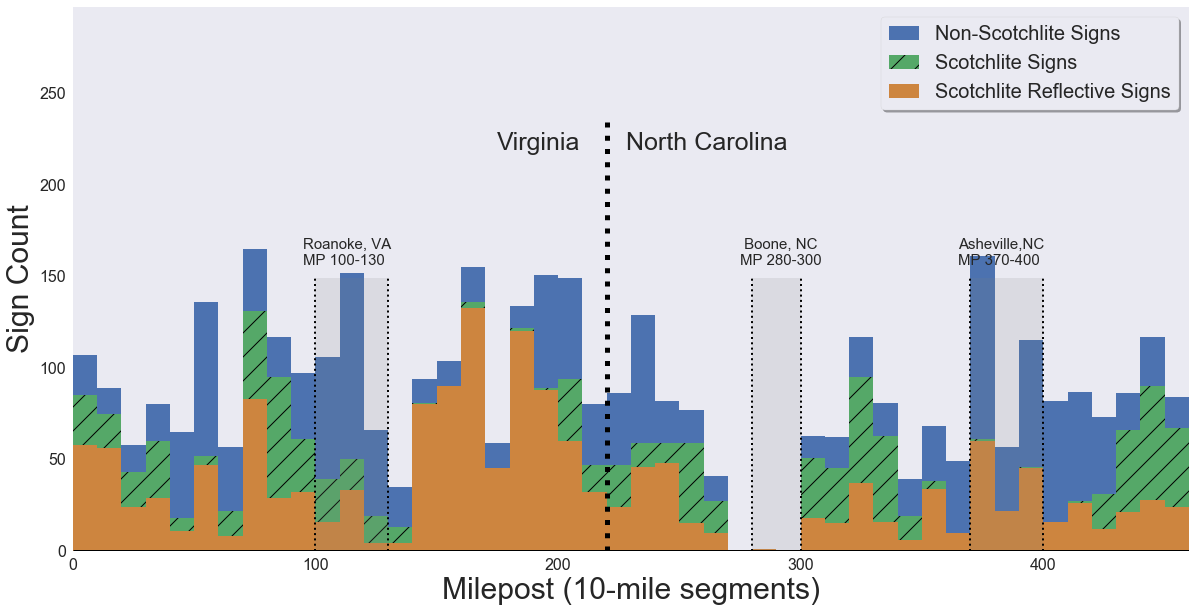

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
graph_title = "No Commercial Vehicle Sign Locations by Physical Locations on BLRI Parkway"
axis_title = "Sign Count"
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(20,10))
tick_spacing = 100


plt.bar(sign_df['Mile Post (ten miles)'].value_counts().index-5,
        sign_df['Mile Post (ten miles)'].value_counts().values,
        width = 10, label = "Non-Scotchlite Signs")

plt.bar(timeofday_sign_df['Mile Post (ten miles)'].value_counts().index-5,
        timeofday_sign_df['Mile Post (ten miles)'].value_counts().values,
        width = 10, label = "Scotchlite Signs", hatch = "/")
plt.bar(timeofday_scotchlite_ref_sign_df['Mile Post (ten miles)'].value_counts().index-5,
        timeofday_scotchlite_ref_sign_df['Mile Post (ten miles)'].value_counts().values,
        width = 10, color = "peru", label = "Scotchlite Reflective Signs")


bar_max = 1.15*max(timeofday_sign_df['Mile Post (ten miles)'].value_counts().max(),
                timeofday_scotchlite_ref_sign_df['Mile Post (ten miles)'].value_counts().max())

plt.bar(115, [0, bar_max/1.05], width = 30, color = 'gray', alpha = 0.15)
plt.bar(290, [0, bar_max/1.05], width = 20, color = 'gray', alpha = 0.15)
plt.bar(385, [0, bar_max/1.05], width = 30, color = 'gray', alpha = 0.15)

ax.text(95, bar_max,
           'Roanoke, VA\nMP 100-130', fontsize=15)

ax.text(275,bar_max,
           ' Boone, NC\nMP 280-300', fontsize=15)
ax.text(365, bar_max,
           'Asheville,NC\nMP 370-400', fontsize=15)
ax.vlines([100, 130, 280, 300, 370,400], ymin=0, ymax = bar_max/1.05,
            linestyles = "dotted", linewidth = 2)
ax.vlines([220], ymin=0, ymax = bar_max*1.5,
            linestyles = "dotted", linewidth = 5, color = 'black')
ax.hlines([0], xmin = 0, xmax = 460,
            linestyles = "solid", linewidth = 3, color = 'black')
ax.text(175, bar_max*1.4, 'Virginia', fontsize=25)
ax.text(228, bar_max*1.4, 'North Carolina', fontsize=25)
#ax.text(200, bar_max*1.15, 'VA', fontsize=25)
#ax.text(225, bar_max*1.15, 'NC', fontsize=25)
#ax.bar(ten_mile_markers_for_graph, ten_mile_signs,width = 5,label ="Stop Signs")

#make graph pretty
ax.set_ylim([0, bar_max*1.9])
ax.set_xlim([0, 460])
#ax.set_title(graph_title,fontsize= 35, pad = 20) # title of plot

ax.set_xlabel('Milepost (10-mile segments)',fontsize = 30) #xlabel
ax.set_ylabel(axis_title, fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.grid('off')
ax.legend(fontsize = 20, frameon=True,fancybox = True,shadow=True, handlelength=1.5,framealpha=1, )
plt.show()

In [104]:
df, title, filter_name, folder_name = sign_df,  "Signs and Crashes","All", "All"

In [105]:
(315-276)/2

19.5

In [106]:
(315+276)/2

295.5

In [107]:
bar_max

18.4

In [108]:
sign_df['Mile Post (ten miles)'].value_counts()

80     165
380    161
170    155
120    152
200    151
210    149
60     136
0      135
190    134
240    129
90     117
450    117
330    117
400    115
10     107
110    106
160    104
100     97
150     94
20      89
420     87
440     86
230     86
460     84
410     82
250     82
340     81
40      80
220     80
260     77
430     73
360     68
130     66
50      65
310     63
320     62
180     59
30      58
70      57
390     57
370     49
270     41
350     39
140     35
290      1
Name: Mile Post (ten miles), dtype: int64

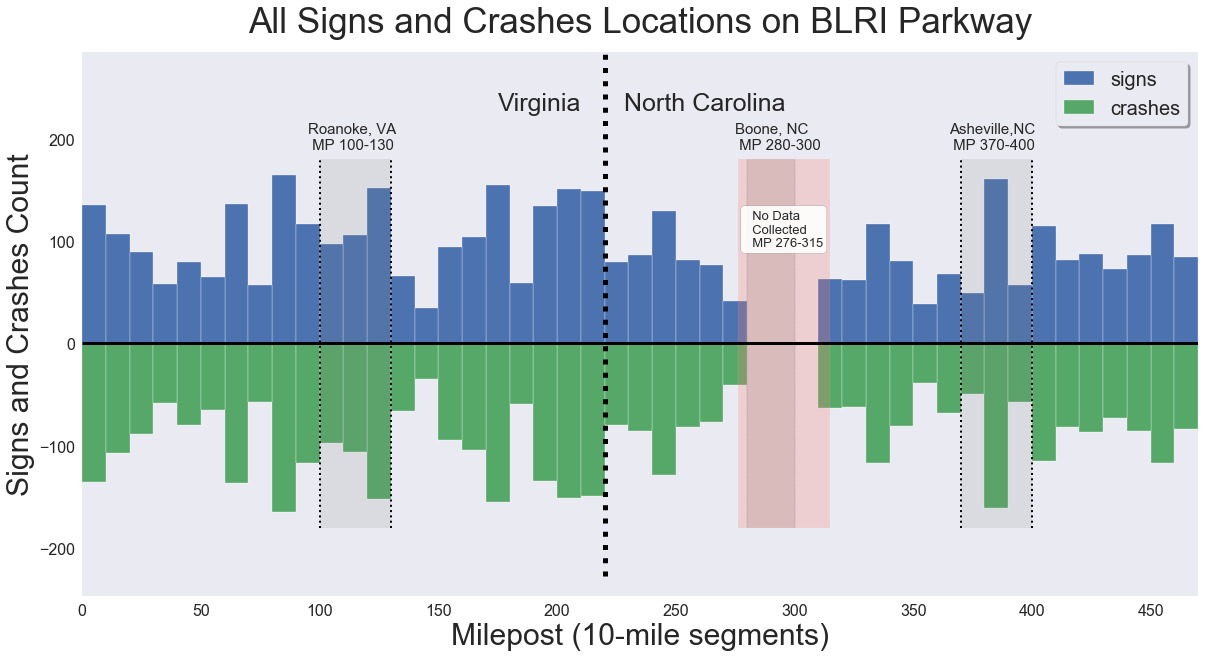

In [109]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
graph_title = filter_name + " " + title + " Locations on BLRI Parkway"
axis_title = title + " Count"
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(20,10))
tick_spacing = 50

plt.bar(sign_df['Mile Post (ten miles)'].value_counts().index+5, 
        sign_df['Mile Post (ten miles)'].value_counts().values,
        width = 10, label = "signs")

plt.bar(sign_df['Mile Post (ten miles)'].value_counts().index+5, 
        -sign_df['Mile Post (ten miles)'].value_counts().values,
        width = 10, label = "crashes")


bar_max = 1.15*max(sign_df['Mile Post (ten miles)'].value_counts().max(),
                    sign_df['Mile Post (ten miles)'].value_counts().max())

plt.bar(115, [-bar_max/1.05, bar_max/1.05], width = 30, color = 'gray', alpha = 0.15)
plt.bar(290, [-bar_max/1.05, bar_max/1.05], width = 20, color = 'gray', alpha = 0.25)
plt.bar(385, [-bar_max/1.05, bar_max/1.05], width = 30, color = 'gray', alpha = 0.15)
ax.vlines([280, 300], ymin=-bar_max/1.05, ymax = bar_max/1.05,
            linestyles = "dotted", linewidth = 0.25)

plt.bar(295.5, [-bar_max/1.05, bar_max/1.05], width = 39, color = 'salmon', alpha = 0.25)
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(279, bar_max/2,
           '  No Data\n  Collected\n  MP 276-315', fontsize=13,
       bbox=bbox_props)


ax.text(95, bar_max,
           'Roanoke, VA\n MP 100-130', fontsize=15)

ax.text(275,bar_max,
           'Boone, NC\n MP 280-300', fontsize=15)
ax.text(365, bar_max,
           'Asheville,NC\n MP 370-400', fontsize=15)
ax.vlines([100, 130, 370,400], ymin=-bar_max/1.05, ymax = bar_max/1.05,
            linestyles = "dotted", linewidth = 2)
ax.vlines([220], ymin=-bar_max*1.2, ymax = bar_max*1.6,
            linestyles = "dotted", linewidth = 5, color = 'black')
ax.text(175, bar_max*1.2, 'Virginia', fontsize=25)
ax.text(228, bar_max*1.2, 'North Carolina', fontsize=25)
#ax.text(200, bar_max*1.15, 'VA', fontsize=25)
#ax.text(225, bar_max*1.15, 'NC', fontsize=25)
#ax.bar(ten_mile_markers_for_graph, ten_mile_signs,width = 5,label ="Stop Signs")
ax.hlines([0], xmin = 0, xmax = 470,
            linestyles = "solid", linewidth = 3, color = 'black')

#make graph pretty
ax.set_ylim([-bar_max*1.3, bar_max*1.5])
ax.set_xlim([0, 470])
ax.set_title(graph_title,fontsize= 35, pad = 20) # title of plot

ax.set_xlabel('Milepost (10-mile segments)',fontsize = 30) #xlabel
ax.set_ylabel(axis_title, fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.grid('off')
ax.legend(fontsize = 20, frameon=True,fancybox = True,shadow=True, handlelength=1.5,framealpha=1, )
